In [25]:
#!/usr/bin/env python3
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "white",
        "transition": "none",
    }
)

{'theme': 'white', 'transition': 'none', 'start_slideshow_at': 'selected'}

In [ ]:
%matplotlib inline

## Presentaciones y encuestas interactivas con jupyter notebooks y RISE
### pycon Colombia 2020
### Sebastian Flores
#### 07 Febrero 2020

**Observaciones:**
* sebastiandres en twitter y github.
* Opiniones y críticas a título personal.
* Presentación en [github.com/sebastiandres/charlas](github.com/sebastiandres/charlas)

Hola. Mi nombre es Sebastián Flores, y quiero compartir algunos experimentos que realicé para realizar encuestas en vivo mientras se presenta en jupyter notebook con la extensión RISE.  No es necesario que tomen apuntes, la presentación y todos los enlaces están en mi github: sebastiandres (el repo se llama charlas, es el primero).

##### Introducción

¿Encuestas interactivas en presentaciones con jupyter notebooks?

<img src="images/intro.png"  width="1200">

La necesidad nació hace algunos meses cuando la noche anterior a realizar una charla a unos estudiantes, quise realizar una encuesta en vivo, pero me di cuenta que no sabía como hacerlo sin salir de RISE y jupyter notebook. Mi talento googleador tampoco me ayudó, así que supongo que si alguien ya lo ha hecho, no lo ha documentado. Así que al menos esto sirve para auto-contestarme. Esto va para ti, Sebastian del lejano pasado.

##### Agenda

0. Sobre hacer presentaciones con RISE.
1. Solución 1: Quick & dirty.
2. Solución 2: ¡Pero quiero los datos!
3. Solución 3: No confío en nadie.

La presentación está estructurada de lo más general a lo más específico, y de lo más mainstream a lo más geek/hipster. Así que un poco de paciencia si hay cosas que parecen muy evidentes.

##### 0.1 Sobre hacer presentaciones con jupyter y RISE

¿Consejos?

* Contenido pensado en tu audiencia. 
* Ensayar, ensayar, ensayar.

Relato: ¿Cómo hacer una buena presentación? Este es un tema en sí mismo. No soy para nada un experto, pero he aprendido algunas cosas.
Relato: Aunque parezca un consejotrivial, hay 2 elementos a considerar: saber quién es la audiencia y preparar el contenido necesario. Y haber ensayado varias veces la presentación y ser familiar con el contenido es la mejor forma de que el relato sea fluido. Al final, toda habilidad es como un músculo. Cuando lo ejercitas, se vuelve más fuerte y resulta más fácil usarlo. Esta misma presentación ya la he ensayado unas 10 veces. Sí, toma tiempo.

##### 0.2 Sobre hacer presentaciones con jupyter y RISE

Si forma parte importante de tu día a día, investiga y aprende a hacer mejores presentaciones.

Libro que considero muy bueno: Confessions of a public speaker - Scott Berkum.


<img src="images/libros.png"  width="300">

Relato: Por supuesto, hay varios libros que se pueden leer al respecto. A mi me gustó este. Confessions of a public Speaker - Scott Berkum. Consejos prácticos y con un tono de humor.

##### 0.3 Sobre hacer presentaciones con jupyter y RISE

¿Qué es la extensión RISE?

<img src="images/RISE.png"  width="1200">

Relato: Si les interesa pueden buscar un tutorial más completo sobre hacer presentaciones en RISE. Pero en resumen, es lo que muestra esta animación (gif). Basta marcar una celda de jupyter notebook con la propiedad “slide”, “sub-slide”, “fragment”, o “” para que esta adquiera la propiedad. Y luego se pone en modo presentación. ¡Voilá!

##### 0.4 Sobre hacer presentaciones con jupyter y RISE

* Slide: Diapositiva normal.
* Fragment: Fragmento de diapositiva.
* Sub-slide: Opcional.
* Skip: No mostrar.
* Notes: Notas.

Toda la info en https://rise.readthedocs.io/

Relato: ¿Para que sirve cada una? “Slide” es efectivamente una diapositiva normal. 
“Fragment” permite que la slide se revele poco a poco.
“Sub-slide” es una diapositiva “opcional”, solo se muestra si se usa la flecha hacia abajo. A mi me confunde recordar en que orden mostrarlos, así que prefiero tenerlas de respaldo por si necesito mostrar una slide “reservada”.
“???” permite que la celda no se muestre.

##### 0.5 Sobre hacer presentaciones con jupyter y RISE

¿Que he aprendido?

* Usa "Ctrl +" y "Ctrl -" para controlar aspecto.

* Entrega parte del control de contenido al público. Usa un teclado+mouse inalámbrico.

* Plantea desafíos de código incompleto pero entrega propuestas de solución.

* `git` es tu amigo.

* Improvisa. Nunca será como planificaste.

Relato: ¿Qué cosas he aprendido en estos años haciendo presentaciones con RISE? 
(0) Más que jugar con los fonts, regular con Ctrl+ y Ctr- como se ve en pantalla.
(1) No tener temor en pedir ideas a la audiencia sobre que valores probar o alternativas de código a implementar. (2) Usar un teclado y mouse inalámbrico, para clases de computación.
(3) Poner soluciones pre-definidas a los problemas, en lugar de escribirlos en directo (por tiempo).
(4) Saber que textos mostrar y cuales ocultar.
(5) Usar un repo para volver a versiones anteriores.
Usar un diagrama de celdas y mostrar lo que hace “con algunas cajitas”.

##### 0.6 Descripción del Problema

**¿Qué queremos?** 

Realizar encuesta interactiva sin salir del modo presentación (en RISE).


**¿Porqué?** 

* Tener una presentación autocontenida: el código queda en jupyter notebook.
* Iterar y obtener retroalimentación de la audiencia cuando importa.
* Corregir k
uando sea necesario.

Relato: Bueno, llevamos 5 minutos y todavía no hablamos siquiera del problema ¡ni código!. ¿Qué es lo que intentamos resolver? Cuando uno realiza presentación a una audiencia desafiante - estudiantes de primer año de universidad, que no resisten 45 minutos sin mirar su celular - resulta interesante proporcionar un medio para obtener retroalimentación de manera sencilla y directa. Pero ¿Podemos hacer eso en presentaciones con jupyter notebook? 

##### 1.7 Descripción del Problema

**¿Se puede?**

Sí, y de varias maneras distintas.

**¿Cómo?**

IFrames.

Relato: Pensaba que era algo muy dificil. Pero finalmente encontré varias formas distintas.

##### 0.9 Descripción del Problema

Nuestro héroe se llama IFrame.

In [26]:
from IPython.display import IFrame
IFrame("https://es.wikipedia.org/wiki/Iframe", width=800, height=500) #https://es.wikipedia.org/wiki/Iframe

Otros:
* https://www.pycon.co/
* https://rise.readthedocs.io/

Relato: Las funciones HTML y Iframe son nuestras héroes. Todo esfuerzo de lo que haremos recae en sus hombros. Diferencias de html y iframe. DEFINICION DE IFRAME. Mostrar 

##### 0.10 Descripción del Problema

Más ejemplos ...

In [27]:
from IPython.display import IFrame
IFrame("https://www.python.org/", width=800, height=300)

No siempre funciona:
* https://www.python.org/
* google, facebook, twitter, ...

En general a los sitios que requieren autentificación (y desean hacer tracking de usuarios) bloquean los IFrames.

##### 0.11 Descripción del Problema: EXTRA

Más ejemplos ...
¡IFrame nos permite incluso embeber un jupyter notebook dentro de otro!

In [ ]:
from IPython.display import IFrame
link="http://localhost:8888/notebooks/2020_02_XX_pycon_rise_and_poll/2020_pycon_RISE_and_poll.ipynb"
#IFrame(link, width=800, height=300) #google, facebook, twitter

Relato: Un aprendizaje interesante que pueden llevarse hoy, es que existen sitios que no permiten ser embebidos en un iframe. Por ejemplo, si tratamos de hacer un iframe de google, nos da el siguiente error. ¿Porqué? Porque XYZ.

Sin embargo, podemos usar un acortador de dirección para evitar ese problema. Por ejemplo, el mismo acordador de dirección de google nos permite bypasear su propia seguridad. Hermoso.

##### 1.1 Problema: Realizar encuestas interactivas.


**Solucion nivel 1:**

KISS: Keep IT Simple, Stupid.

Podemos usar IFrame con los servicios de alguna compañía especializada en encuestas interactivas:
* Polleverywhere
* Mentimeter
* Muchos, muchos otros...

Relato: Solución nivel 1. Meme de “cerebro”. Hay un principio elemental en programación: KISS. Keep it Simple, Stupid. No hay para que reinventar la rueda cuando podemos aprovechar lo que otras personas ya han hecho.

Relato: Hay varias empresas que proporcionan servicios para realizar encuestas en vivo, que funciona a través de páginas web. Algunas de las empresas que pueden revisar para esto son: Mentimeter, Survey, Polleverywhere, por ejemplo. Spoiler Alert: Son todas bastante parecidas.

##### 1.2 Solución nivel 1: Encuesta

Probemos este método con una encuesta simple:

In [28]:
from IPython.display import IFrame
IFrame("https://pollev.com/sebastianflo711", width=800, height=600)

Relato: Hagamos un primer experimento. Yo ya cree una encuesta que deberán responder. ¿Listos? En sus celulares, busquen la página web que se encuentra en pantalla y voten. 
Mostrar con un iframe y leer.

##### 1.3 Solución nivel 1: 

Link encuesta: https://pollev.com/sebastianflo711

**¿Qué debe cumplir un sitio de encuestas interactivas?**

* Encuesta acccesible por url pública, incrustable por iframe.
* Gráfico dinámico accesible por url pública, incrustable por iframe.

Relato: ¿Qué necesitamos de esta encuesta? Que tenga las siguientes características:
Encuesta accesible con una url pública, para poder compartir el enlace durante la presentación.
Gráficos disponibles a partir de una url pública o privada, para incrustarla el grafico en la ppt.

##### 1.3 Solución nivel 1: https://pollev.com/sebastianflo711

Veamos los resultados de la encuesta anterior.

In [29]:
from IPython.display import IFrame
IFrame("https://www.polleverywhere.com/multiple_choice_polls/7Xwy472JbCrk3fITm12XM", width=800, height=600)
# Observación: ¡requiere estar autentificado como dueño de la encuesta!

Relato: Mientras ustedes votan, podemos ya comenzar a ver los resultados. Ejecutar el iframe varias veces.

##### 1.4 Solución nivel 1:  Resumen
¿Cómo se debe usar?

1. Seleccionar algún proveedor.
1. Crear y configurar la encuesta previamente.
1. Obtener el enlace de las preguntas, e incrustarla con un iframe.
1. Obtener el gráfico de las respuestas, e incrustarla con un iframe.
1. Probar que funcione correctamente. Borrar respuestas de prueba. 

Relato: En general, la versión “gratis” permite hacer preguntas y ver los resultados, pero requiere haberla preparado antes para tener el enlace, y no permite descargar los resultados para explorarlos más “cientificamente”. Es necesario haber creado la presentación de antemano y es más difícil cambiarla a último momento. Dependiendo de la empresa, funciona más o menos fácil y “auto-refresh”.

##### 1.5 Pausa
¿Que viene antes, el huevo o la gallina?

In [30]:
# Solución al problema
# python3 permite usar unicode
sorted(['\N{EGG}', '\N{CHICKEN}'])

['🐔', '🥚']

##### 2.1 Problema: Realizar encuestas interactivas.

**Solución Nivel 2**

Una segunda opción que requiere un poco más de configuración pero entrega más control, es usar un servicio de encuestas tradicional:

* Microsoft Forms
* Google Forms
* Survey Monkey
* Typeform
* Muchas otras...

Relato: El siguiente nivel es enviar una encuesta de un servicio más estándar, como Google Survey, Microsoft Forms, Survey Monkey o Typeform.

##### 2.2 Solución Nivel 2: Encuesta + Datos

Probemos este método con otra encuesta simple:

In [31]:
long_url = "https://forms.office.com/Pages/ResponsePage.aspx?id=zu7OdUTRPU-clJ5rQCX8_4qs5cX1Y7dFhVdiCz848sBUNFU3UzU3OTNHVDhWNURSMEs2WDBUMDdCTi4u"
short_url = "https://bit.ly/2uYDdhm"
iframe_options = {"width":800, "height":600}
IFrame(short_url, **iframe_options)

Notas: Por ejemplo, accedan a la encuesta que se encuentra en la siguiente dirección: 

##### 2.3 Solución Nivel 2:  

Link encuesta: 
# https://bit.ly/2uYDdhm

<br/>
¿Qué debe cumplir un sitio de encuestas interactivas?

* Encuesta accesible al público mediante un enlace abierto. Puede que no sea incrustable con un iframe.
* Opcionalmente, que cuente con gráficos en línea.
* Datos disponibles y puedan descargarse.
* Crear una función (en Python) para descargar e interpretar los datos.
* Probar que la encuesta funcione. Borrar las respuestas de prueba.

Notas: ¿Que fue lo que hicimos acá? Veamos un poco más de detalle. La página web que accesaron tuvo que ser creada antes, y el link para compartir incrustado en la presentación. La tabla con los resultados se interpreta con alguna función apropiada, por ejemplo, en este caso, usé pandas y matplotlib porque porqué no.

##### 2.4 Solución Nivel 2: Respuestas

In [32]:
long_url = "https://forms.office.com/Pages/AnalysisPage.aspx?id=zu7OdUTRPU-clJ5rQCX8_4qs5cX1Y7dFhVdiCz848sBUNFU3UzU3OTNHVDhWNURSMEs2WDBUMDdCTi4u&AnalyzerToken=ND54U8Erls95gHxjbyWus4LzH6FPyZ35"
short_url = "https://bit.ly/37We2dE"
iframe_options = {"width":800, "height":600}
IFrame(short_url, **iframe_options)

In [ ]:
df.head()

##### 2.4 Solución Nivel 2: Respuestas  (versión 2)

* Descargamos la planilla de datos con el resultado desde algún [enlace](https://uplanner-my.sharepoint.com/:x:/r/personal/sebastian_flores_u-planner_com/_layouts/15/Doc.aspx?sourcedoc=%7B7D9BF52E-2931-4702-86ED-00792E617ECF%7D&file=2020_02_09_encuesta2_pycon.xlsx&action=default&mobileredirect=true) 

In [33]:
# Alternative to ls data/*.xlsx
import glob
glob.glob("data/*.xlsx")

['data/2020_02_08_encuesta2_pycon.xlsx']

In [34]:
import pandas as pd
df_dict = pd.read_excel("data/2020_02_08_encuesta2_pycon.xlsx", sheet_name=None)
df_dict.keys()

odict_keys(['Hoja1', '_56F9DC9755BA473782653E2940F9', 'Form1'])

In [35]:
df = df_dict["Form1"]
question = df.columns[-1]
print(question)
df.head()

Which one is the best pet?


,ID,Start time,Completion time,Email,Name,Which one is the best pet?
0,6,2020-02-03 13:56:04,2020-02-03 13:56:11,anonymous,NaN,Otra!
1,7,2020-02-03 13:56:23,2020-02-03 13:56:36,anonymous,NaN,Python
2,8,2020-02-03 13:56:38,2020-02-03 13:56:41,anonymous,NaN,Dog
3,9,2020-02-03 14:28:15,2020-02-03 14:28:27,anonymous,NaN,Python


 La tabla con los resultados se interpreta con alguna función apropiada, por ejemplo, en este caso, usé pandas y matplotlib porque porqué no.

##### 2.5 Solución Nivel 2: Respuestas

In [36]:
question_df = df[question]
answer_counts = question_df.value_counts()
answer_counts

Python    2
Otra!     1
Dog       1
Name: Which one is the best pet?, dtype: int64

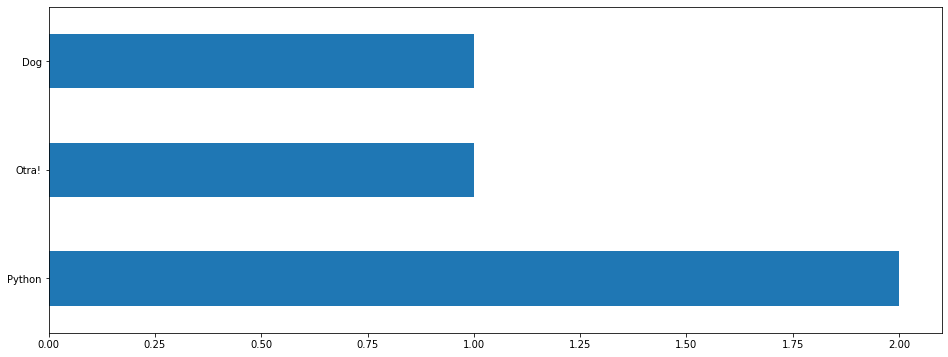

In [39]:
from matplotlib import pyplot as plt
answer_counts.plot.barh(figsize=(16,6))
plt.show()

##### 2.6 Solución Nivel 2: Respuestas

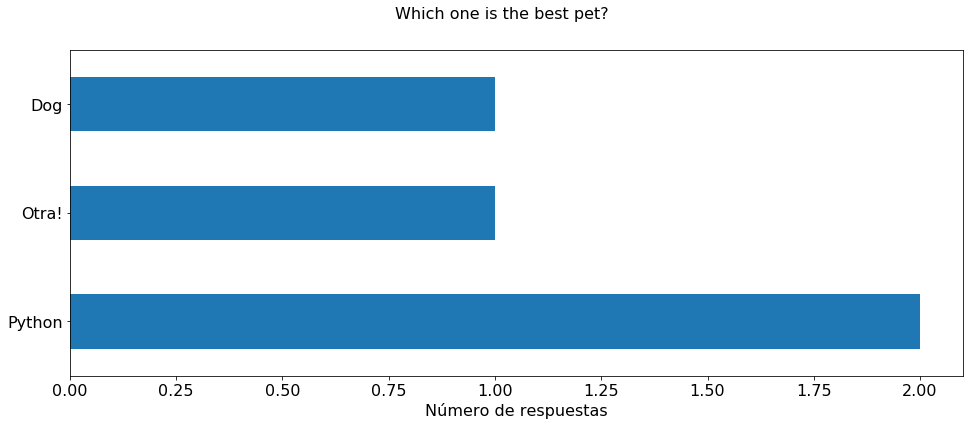

In [40]:
from matplotlib import pyplot as plt
answer_counts.plot.barh(figsize=(16,6), fontsize=16)
plt.suptitle(question, fontsize=16)
plt.xlabel("Número de respuestas", fontsize=16)
plt.ylabel("");

##### 2.7 Solución nivel 2: Resumen

1. Elegir algún proveedor.
1. Crear la encuesta.
1. Obtener la url pública de las preguntas, e incrustarla en un iframe.
1. Obtener la url de los datos de las respuestas.
1. Usar una api o descargar los datos.
1. Graficar desde python para interpretar los datos.

Leer.

##### 2.1 Problema: Realizar encuestas interactivas.

**Solución Nivel 3**

La solución más compleja es por supuesto hacer el sistema completo:

* **Base de datos**: donde almacenar la encuesta y las respuestas. 
* **Frontend**: para realizar la encuesta.
* **Backend**: interactuar con la base de datos. 

En este caso: mysql, flask, flask-mysql y pandas, con algo de html y css, y una librería de javascript para graficar.

Notas: Por supuesto, la versión que nos da más control de todo es hacerlo a lo macgiver. Par los millenials de la sala, macgiver es un programa de televisión donde el protagonista podía hacer una bomba con un moco. En fin, la idea es hacer todo desde cero: la página web con su base de datos y gráficos.

##### Solución Nivel 3

¿Porqué alguien voluntariamente se sometería a este tormento?

**Filosofía xkcd**: 

¿Porqué hacer algo simple cuando podrías hacer algo extremadamente complejo *de la manera más simple posible*, aprendiendo mucho en el camino?

<img src="images/automation.png"  width="600">

##### Solución Nivel 3

¿xkcd en python?

In [41]:
import antigravity

##### Solución Nivel 3

In [45]:
from IPython.display import IFrame
IFrame("http://localhost:5000/", width=1000, height=1000)

Notas: Sí, es bastante trabajo. Este es un diagrama reducido de cómo funcionaría.

##### Solución Nivel 3

El código de polite se encuentra en https://github.com/sebastiandres/surveys_with_flask_and_xkcd_charts.


Hace uso de muchos recursos publicamente disponibles (además de mysql, python+librerías):
* Font xkcd.ttf de ipython, https://github.com/ipython/xkcd-font
* Librería xkcd_chart en javascript: https://timqian.com/chart.xkcd/
* Una cantidad vergonzosamente grande de búsquedas en internet y stackoverflow. 

Notas: Pero tiene la ventaja que es posible dejarlo tal y cual lo queremos. Por ejemplo, si quiero cambiar la pregunta y sus opciones durante la presentación. Para lograr esto le di la funcionalidad de que genere automáticamente una encuesta a partir de un texto con formato markdown.


##### Solución Nivel 3

Una de las cosas que más me llamó la atención fue cómo hacer una función que pudiese transformar un texto markdown en la serie de preguntas y opciones de respuesta. Finalmente la implementación fue así:

In [ ]:
def markdown_parser(my_text):
    if my_text.count(":")!=1:
        print("Cannot parse, there's an error in the format")
        return {"is_format_ok":False, "markdown_str":my_text}
    single_option = 0
    multiple_option = 0
    if ("* " in my_text) or ("\n* " in my_text):
        single_option = 1
        split_char = "*"
    if ("^ " in my_text) or ("\nv " in my_text):
        multiple_option = 1
        split_char = "^"
    # If both False or both True, simultaneoulsy, there's an error
    if single_option==multiple_option:
        print("Cannot parse, there's an error in the format")
        return {"is_format_ok":False, "markdown_str":my_text}
    question_str, answer_str = my_text.split(":")
    question = question_str.strip()
    answer_list = [_.strip() for _ in answer_str.split(split_char)[1:6]] # Skip the empty string, reach to the fifth existing one
    answer_list = answer_list + ["" for _ in range(5-len(answer_list))] # Fill with empty ones if needed
    question_type = single_option*"radio"+multiple_option*"checkbox" # This is the html convention
    # Create the dict
    md_dict = {}
    md_dict["is_format_ok"] = True
    md_dict["markdown_str"] = my_text
    md_dict["type_str"] = question_type
    md_dict["question_str"] = question
    md_dict["option_1_str"] = answer_list[0]
    md_dict["option_2_str"] = answer_list[1]
    md_dict["option_3_str"] = answer_list[2]
    md_dict["option_4_str"] = answer_list[3]
    md_dict["option_5_str"] = answer_list[4]
    return md_dict

##### Solución Nivel 3


In [ ]:
markdown_parser("Q: * A * B * C * D * E * F * G ")

In [ ]:
markdown_parser("Q: ^ A ^ B ^ C ^ D ^ E ^ F ^ G ")

Notas: Para eso, tuve que yo mismo definir ciertas convenciones. Una pregunta de alternativas únicas tipo button, se genera con opciones dadas con *. Una pregunta de alternativas multiples, se genera con alternativas encabezadas por ^.

##### Solución Nivel 3

Hagamos la prueba:

In [46]:
from IPython.display import IFrame
IFrame("http://localhost:5000/survey", width=1000, height=1000)

Notas: Hagamos un último experimento. Respondan a la siguiente encuesta. 
Ejecutar funcionalidad que permite compilar y mostrar una pregunta.
DEBE: Generar una url + decir tipo de pregunta + mostrar html compilado con preguntas a responder.

##### Solución Nivel 3

Veamos los resultados:

In [47]:
from IPython.display import IFrame
IFrame("http://localhost:5000/bar_chart", width=1000, height=1000)

Notas: Y ahora veamos los resultados. 
Ejecutar función específica para ver los resultados de la encuesta. 
Los gráficos, en caso que se pregunten, están hechos con la librería xkcdcharts de javascript que emulan los clásicos dibujos del webcomic xkcd.


##### Conclusión: Opción 1

<table align="left" style='font-size:120%' >
  <tr>
    <td><b></b></td>
    <td><b>Ventaja</b></td>
    <td><b>Desventaja</b></td>
  <tr>
    <td>Complejidad</td>
    <td>Trivial</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Precio</td>
    <td>Versión limitada gratis</td>
    <td>Versión pagada con más funcionalidades</td>
  </tr>
  <tr>
    <td>Gráficos</td>
    <td>Gráficos predefinidos</td>
    <td>Gráficos predefinidos</td>
  </tr>
  <tr>
    <td>Datos</td>
    <td>-</td>
    <td>Sin accceso a datos</td>
  </tr>
</table>

Notas: Para concluir, veamos los pros y contras de estas 3 opciones. 
La opción “iframe de empresa de encuestas interactiva” tiene como ventaja el ser extremadamente sencillo, pero con limitaciones en la representación gráfica y en la descarga de resultados, y hay que preparar preguntas de antemano. Pero en relación al tiempo-calidad, es muy conveniente.
Imagen: Nobody aint time 4 that

##### Conclusión: Opción 2

<table align="left" style='font-size:120%'>
  <tr>
    <td><b></b></td>
    <td><b>Ventaja</b></td>
    <td><b>Desventaja</b></td>
  <tr>
    <td>Complejidad</td>
    <td>Simple</td>
    <td></td>
  </tr>
  <tr>
    <td>Precio</td>
    <td>Versión gratis es suficiente</td>
    <td></td>
  </tr>
  <tr>
    <td>Gráficos</td>
    <td>Configurables</td>
    <td>Requieren código</td>
  </tr>
  <tr>
    <td>Datos</td>
    <td>Con accceso a datos</td>
    <td></td>
  </tr>
</table>

Notas: La opción “encuesta tradicional” tiene la ventaja de permitir almacenar y revisar los resultados, pero requiere haber creado previamente funciones para descargar y graficar los resultados. Sigue siendo conveniente, pero a veces tiene un delay que hace que los resultados no sean “realmente en vivo”. Hay que preparar preguntas de antemano, y las funciones para graficar.
(¿Alguna imagen donde el lag sea divertido?)


##### Conclusión: Opción 3

<table align="left" style='font-size:120%'>
  <tr>
    <td><b></b></td>
    <td><b>Ventaja</b></td>
    <td><b>Desventaja</b></td>
  <tr>
    <td>Complejidad</td>
    <td></td>
    <td>Bastante complejo. Toma tiempo.</td>
  </tr>
  <tr>
    <td>Precio</td>
    <td>Hosting gratis es suficiente</td>
    <td></td>
  </tr>
  <tr>
    <td>Gráficos</td>
    <td>Configurables</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Datos</td>
    <td>Con accceso completo a datos</td>
    <td></td>
  </tr>
</table>

Notas: La opción “lo haré yo mismo” (imagen de bender con su meme de blackjack y putas) tiene la ventaja de tener todo lo imaginable: control de los datos, control de los gráficos, incluso generación “dinámica” a partir de un markdown. Pero tiene la desventaja de haber necesitado crear todo eso. Pero es un aprendizaje altamente educativo, aunque costoso en tiempo. Si les interesa, pueden ver el repo en mi github: sebastiandres + little_survey_website.

##### Conclusión

## ¿Preguntas?



Encuesta sobre la charla: 
<div style:'fontsize:150%'> https://bit.ly/2UzrYGU </div>

Slide: ¿Preguntas?
Notas: Y bueno, así llegamos a la sección final  de preguntas en la cual pasaremos 5 minutos incómodos en silencio, a menos que alguien quiera hacer alguna pregunta y observación. Mientras tanto, pueden responder a una última encuesta: 
PONER LINK PERO NO MOSTRAR CONTENIDO.